In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# load the dataset
data = pd.read_csv('creditcard.csv' )
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.drop_duplicates(subset=None, inplace=True)
data.shape

(283726, 31)

In [5]:
# explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [7]:
# check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Number of fraud and no fraud cases
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [9]:
# ratio of fraud and no fraud cases
data["Class"].value_counts(normalize=True)*100

0    99.83329
1     0.16671
Name: Class, dtype: float64

In [10]:
a = data[data.Class==0]
b = data[data.Class==1]

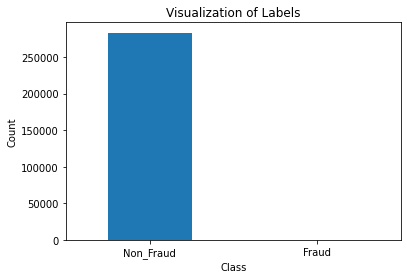

In [11]:

labels = ["Non_Fraud","Fraud"]
count_classes = data.value_counts(data['Class'],sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt. title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks (range(2), labels)
plt. show()

<AxesSubplot:>

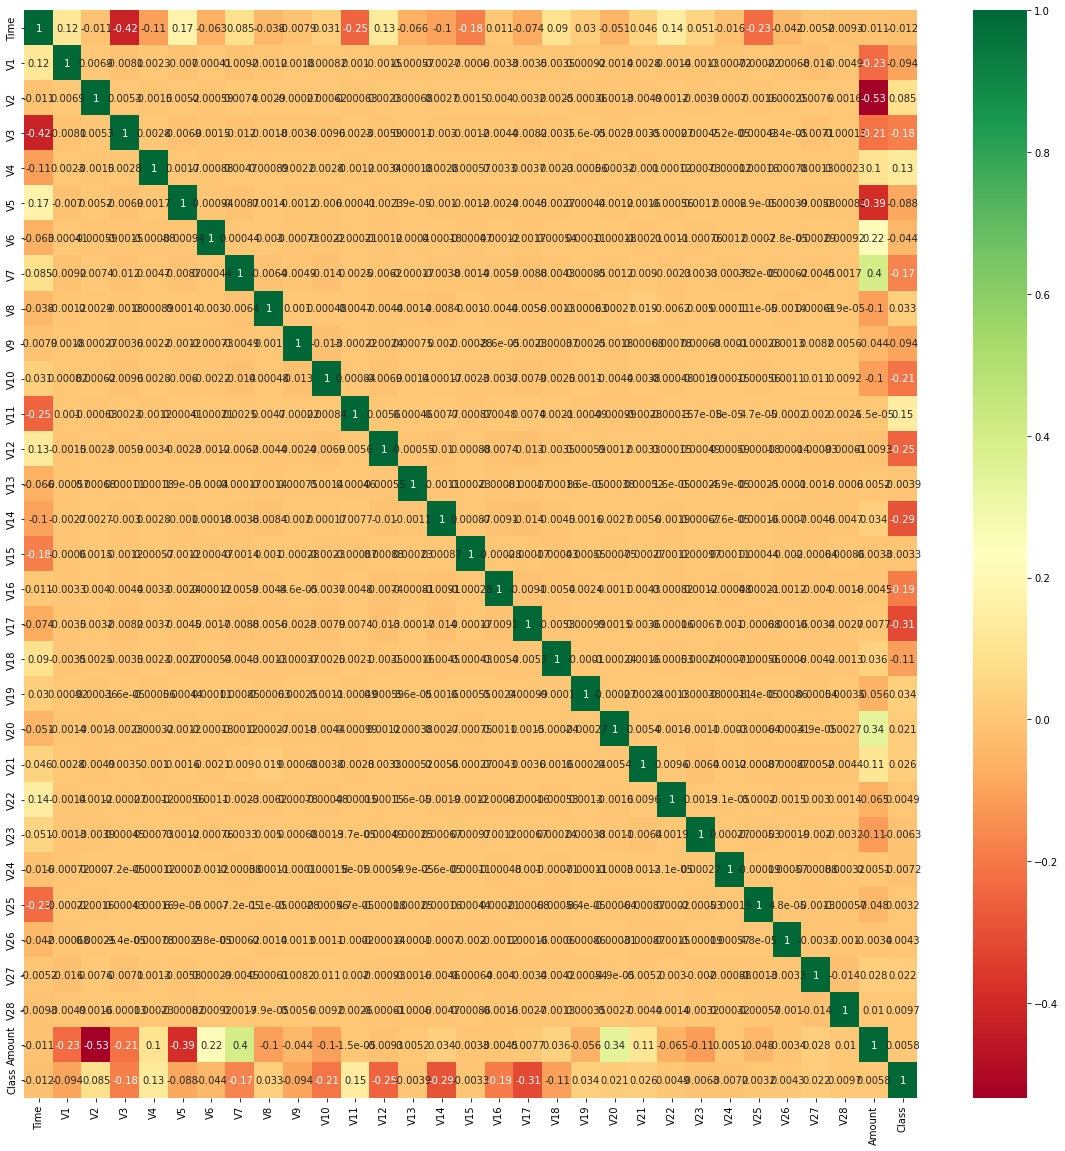

In [12]:
# Heatmap
#data1 = data['Age','Tenure','CreditScore','Balance','NumOfProducts','EstimatedSalary']
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
sns.heatmap(data[top_corr_features].corr(),annot=True, cmap = 'RdYlGn')

In [13]:
# Preprocessing: scale the amount column and drop the Time column
scaler = StandardScaler()
data['normalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [14]:
# Split the dataset into training and testing sets
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
X_train.shape

(226980, 29)

In [16]:
X_test.shape

(56746, 29)

In [17]:
train_proportion = y_train.value_counts(normalize=True)
test_proportion = y_test.value_counts(normalize=True)

print('Training set proportion:', train_proportion)
print('Test set proportion:', test_proportion)


Training set proportion: Class
0        0.998335
1        0.001665
dtype: float64
Test set proportion: Class
0        0.998326
1        0.001674
dtype: float64


### Confusion Matrix 

In [18]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Logistic Regression

In [19]:
# Train a logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/rasna/Python/anaconda3/envs/tensorflow_tf/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [20]:
# Predict the labels of the test data using the trained model
y_pred = lr.predict(X_test)

In [21]:
# Evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9991188806259472
Confusion matrix:
 [[56641    10]
 [   40    55]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746



Confusion matrix, without normalization
[[56641    10]
 [   40    55]]


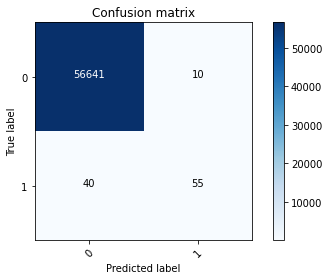

In [22]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

## Random Forest

In [23]:
# create a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state = 42)

In [24]:
# fit the model to the training data
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [25]:
# make predictions on the test data
y_pred = rfc.predict(X_test)

In [26]:
# Evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9995241955380115
Confusion matrix:
 [[56649     2]
 [   25    70]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



Confusion matrix, without normalization
[[56649     2]
 [   25    70]]


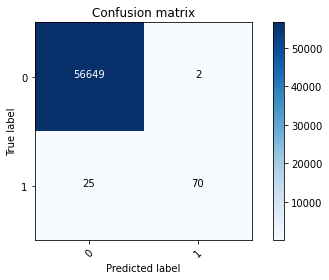

In [27]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

## Decision Tree

In [28]:
# Train a decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [29]:
# Make predictions on the testing set
y_pred = dtc.predict(X_test)

In [30]:
# Print the confusion matrix and classification report
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9989426567511367
Confusion matrix:
 [[56624    27]
 [   33    62]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.70      0.65      0.67        95

    accuracy                           1.00     56746
   macro avg       0.85      0.83      0.84     56746
weighted avg       1.00      1.00      1.00     56746



Confusion matrix, without normalization
[[56624    27]
 [   33    62]]


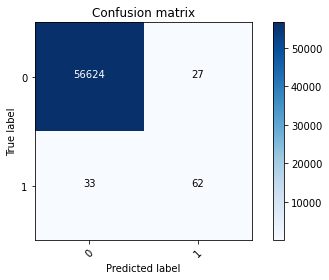

In [31]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

## SVM

In [32]:
# Train an SVM classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

/Users/rasna/Python/anaconda3/envs/tensorflow_tf/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [33]:
# Make predictions on the testing set
y_pred = svm.predict(X_test)

In [34]:
# Print the confusion matrix and classification report
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9993303492757198
Confusion matrix:
 [[56650     1]
 [   37    58]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.98      0.61      0.75        95

    accuracy                           1.00     56746
   macro avg       0.99      0.81      0.88     56746
weighted avg       1.00      1.00      1.00     56746



Confusion matrix, without normalization
[[56650     1]
 [   37    58]]


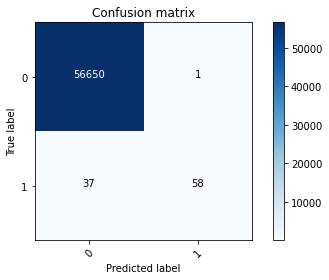

In [35]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier 

In [37]:

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/Users/rasna/Python/anaconda3/envs/tensorflow_tf/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9994889507630493
Confusion matrix:
 [[56649     2]
 [   27    68]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Confusion matrix, without normalization
[[56649     2]
 [   27    68]]


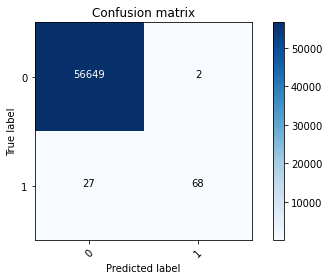

In [39]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

## Undersampling Methode

In [49]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fit and apply the undersampling strategy to the training data
X, y = undersample.fit_resample(X_train, y_train)
X_test.shape

(45396, 29)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Decision Tree

In [42]:
dtc.fit(X_train,y_train.values.ravel())
y_pred = dtc.predict(X_test)

In [43]:
# Print the confusion matrix and classification report
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9992290069609657
Confusion matrix:
 [[45290    19]
 [   16    71]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45309
           1       0.79      0.82      0.80        87

    accuracy                           1.00     45396
   macro avg       0.89      0.91      0.90     45396
weighted avg       1.00      1.00      1.00     45396



### Logistic regression

In [44]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/Users/rasna/Python/anaconda3/envs/tensorflow_tf/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [45]:
# Print the confusion matrix and classification report
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

(756, 1)

### Random Forest

In [46]:
rfc.fit(X_train, y_train.values.ravel())
y_pred = rfc.predict(X_test)

In [47]:
# Evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9995153758040356
Confusion matrix:
 [[45306     3]
 [   19    68]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45309
           1       0.96      0.78      0.86        87

    accuracy                           1.00     45396
   macro avg       0.98      0.89      0.93     45396
weighted avg       1.00      1.00      1.00     45396

